In [3]:
import h2o
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator



In [4]:
#initialize the H2o server

h2o.init(max_mem_size = 2) # initializing h2o server
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,42 mins 57 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,"14 days, 12 hours and 29 minutes"
H2O cluster name:,nikhil
H2O cluster total nodes:,1
H2O cluster free memory:,3.453 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [5]:
#do the preprocessing
carDf= pd.read_csv('oneHotPreprocess.csv')

In [6]:
carDf.head()

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,...,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Age,Deductible,DriverRating,DaysDiff,Lable
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0.2625,0.000000,0.000000,0.071795,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0.4250,1.000000,1.000000,0.069231,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0.5875,0.666667,0.666667,0.089744,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.8125,0.333333,0.333333,0.107692,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0.3375,0.000000,0.000000,0.094872,0


In [7]:
creditData= carDf 
creditData.describe()

,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,...,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,Age,Deductible,DriverRating,DaysDiff,Lable
count,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,...,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000
mean,0.030612,0.000973,0.109021,0.007069,0.000130,0.029185,0.181594,0.000389,0.000065,0.152669,...,0.001362,0.000130,0.288475,0.386666,0.324859,0.498229,0.495947,0.495947,0.083579,0.059861
std,0.172269,0.031176,0.311676,0.083784,0.011389,0.168330,0.385522,0.019723,0.008053,0.359680,...,0.036881,0.011389,0.453068,0.487002,0.468337,0.168612,0.373161,0.373161,0.066740,0.237237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.387500,0.000000,0.000000,0.058974,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.475000,0.333333,0.333333,0.066667,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.600000,0.666667,0.666667,0.082051,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
creditData.shape

(15419, 86)

In [9]:
creditData.isnull().values.any() # pandas method
# creditData_h2o.na_omit() # h2o method
# creditData_h2o.nacnt() # no missing values found

False

In [10]:
# Turns python pandas frame into an H2OFrame
creditData_h2o  = h2o.H2OFrame(creditData)

# Let’s plot the Transaction class against the Frequency
labels = ['normal','fraud']
classes = pd.value_counts(creditData['Lable'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

Parse progress: |█████████████████████████████████████████████████████████| 100%


Text(0,0.5,'Frequency')

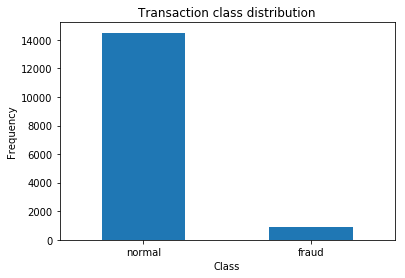

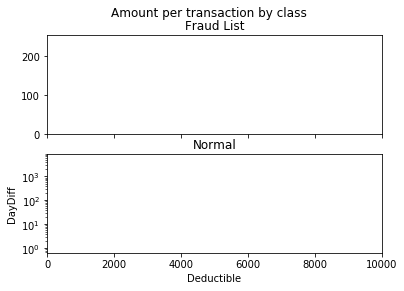

In [11]:
fraud = creditData[creditData.Lable == 1]
normal = creditData[creditData.Lable == 0]
# Amount vs Class
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')

ax1.hist(fraud.Deductible, bins = 50)
ax1.set_title('Fraud List')

ax2.hist(normal.DaysDiff, bins = 50)
ax2.set_title('Normal')

plt.xlabel('Deductible')
plt.ylabel('DayDiff')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

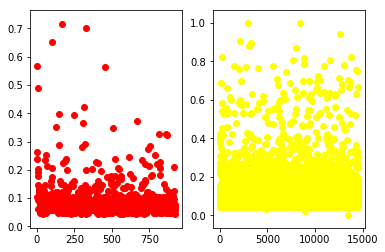

In [12]:
#plotting the dataset considering the class
color = {1:'red', 0:'yellow'}
fraudlist = creditData[creditData.Lable == 1]
normal = creditData[creditData.Lable == 0]
fig,axes = plt.subplots(1,2)

axes[0].scatter(list(range(1,fraudlist.shape[0] + 1)), fraudlist.DaysDiff,color='red')
axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.DaysDiff,color='yellow')
plt.show()

In [13]:
features= creditData_h2o

In [14]:
train, test = features.split_frame([0.7])
print(train.shape)
print(test.shape)

(10671, 86)
(4748, 86)


In [15]:
# converting to pandas dataframe
train_df = train.as_data_frame()
test_df = test.as_data_frame()

train_df = train_df[train_df['Lable'] == 0]

# drop the Class variable
train_df = train_df.drop(['Lable'], axis=1)

Y_test_df = test_df['Lable'] # true labels of the testing set

test_df = test_df.drop(['Lable'], axis=1)

train_df.shape

(10022, 85)

In [16]:
train_h2o = h2o.H2OFrame(train_df) # converting to h2o frame
test_h2o = h2o.H2OFrame(test_df)
x = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
print("x:",x)
train_h2o.shape

x: ['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW', 'AccidentArea_Rural', 'AccidentArea_Urban', 'Sex_Female', 'Sex_Male', 'MartalStatus_Divorced', 'MartalStatus_Married', 'MartalStatus_Single', 'MartalStatus_Widow', 'Fault_Policy Holder', 'Fault_Third Party', 'VehicleCategory_Sedan', 'VehicleCategory_Sport', 'VehicleCategory_Utility', 'VehiclePrice_20,000 to 29,000', 'VehiclePrice_30,000 to 39,000', 'VehiclePrice_40,000 to 59,000', 'VehiclePrice_60,000 to 69,000', 'VehiclePrice_less than 20,000', 'VehiclePrice_more than 69,000', 'Days:Policy-Accident_1 to 7', 'Days:Policy-Accident_15 to 30', 'Days:Policy-Accident_8 to 15', 'Days:Policy-Accident_more than 30', 'Days:Policy-Accident_none', 'Days:Policy-Claim_15 to 30', 'Days:Policy-Claim_8 to 15', 'Days:Policy-Cl

(10022, 85)

In [80]:
#fixing the parameters
anomaly_model = H2OAutoEncoderEstimator(activation = "tanh",
                               hidden = [85,42,28,10,10,28,42,85],
                               epochs = 250,
                               standardize = True,
                                stopping_metric= 'Auto',
                                train_samples_per_iteration = 32,
                                shuffle_training_data = True,     
                               autoencoder = True,
                               l1 = 0.001)



In [81]:
#train the model
anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [82]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,Deductible,1.000000,1.000000,0.032642
1,DriverRating,0.874250,0.874250,0.028537
2,AgeOfVehicle_6 years,0.844357,0.844357,0.027561
3,MartalStatus_Single,0.833150,0.833150,0.027196
4,PastNumberOfClaims_2 to 4,0.796878,0.796878,0.026012
5,NumberOfSuppliments_more than 5,0.786656,0.786656,0.025678
6,"VehiclePrice_30,000 to 39,000",0.785813,0.785813,0.025650
7,Sex_Female,0.615121,0.615121,0.020079
8,BasePolicy_Collision,0.562962,0.562962,0.018376
9,Fault_Policy Holder,0.541069,0.541069,0.017661


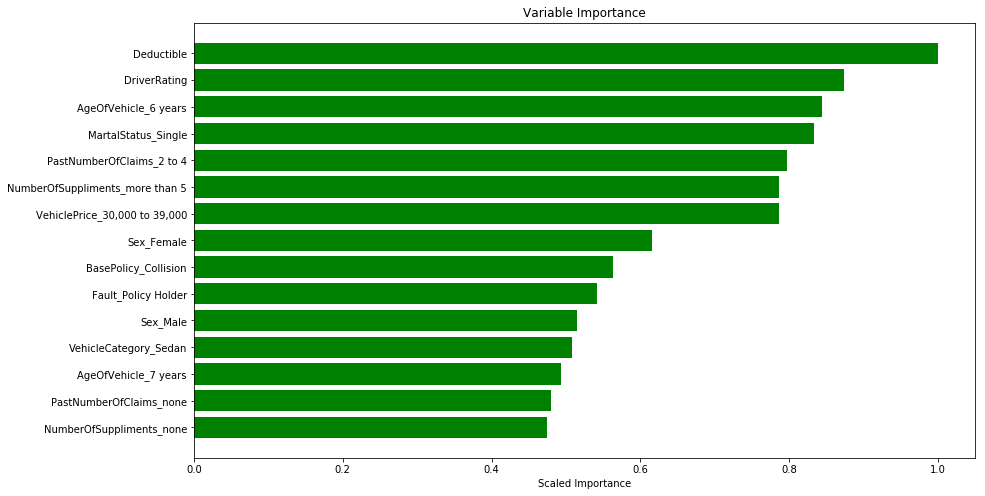

In [83]:
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5,0,'epoch')

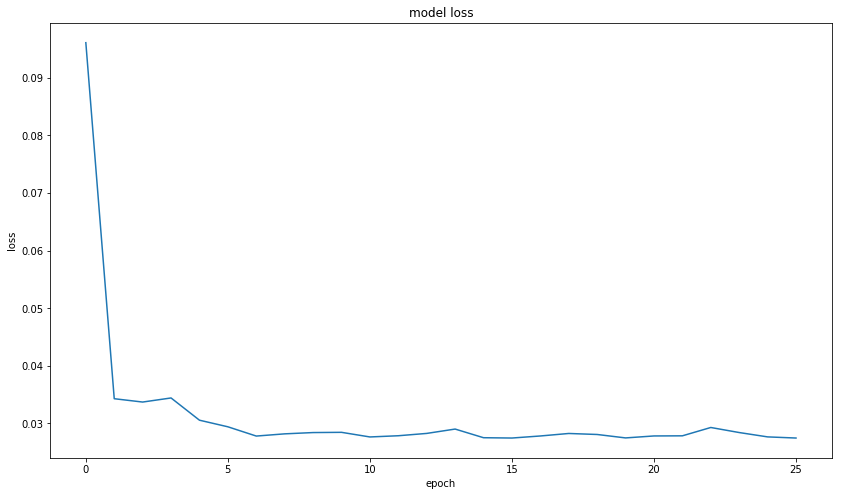

In [84]:
# plotting the loss
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

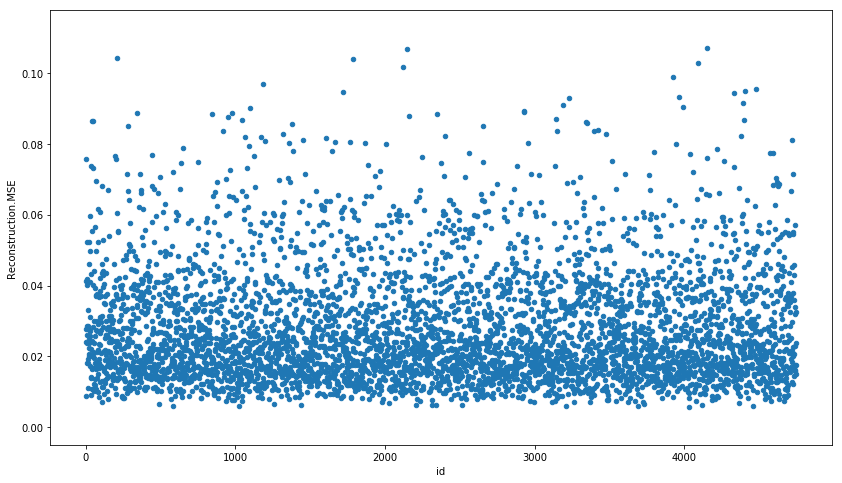

In [85]:
test_rec_error = anomaly_model.anomaly(test_h2o) 

recon_error = anomaly_model.anomaly(test_h2o)
# anomaly is a H2O function which calculates the error for the dataset

# converting to pandas dataframe
test_rec_error_df = test_rec_error.as_data_frame()

# plotting the testing dataset against the error
test_rec_error_df['id']=test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [86]:
# predicting the class for the testing dataset
predictions = anomaly_model.predict(test_h2o)

error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,4748.000000,4748.000000
mean,0.027665,0.057709
std,0.015703,0.233216
min,0.005742,0.000000
25%,0.016490,0.000000
50%,0.023101,0.000000
75%,0.035457,0.000000
max,0.107104,1.000000


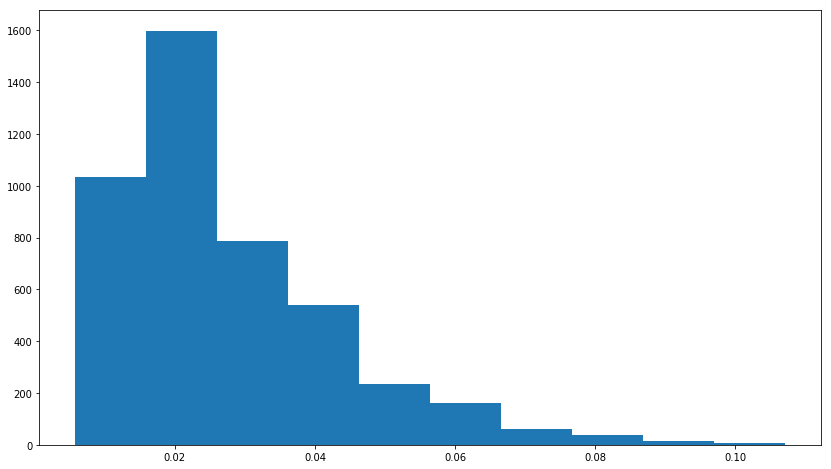

In [87]:
# reconstruction error for the normal transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

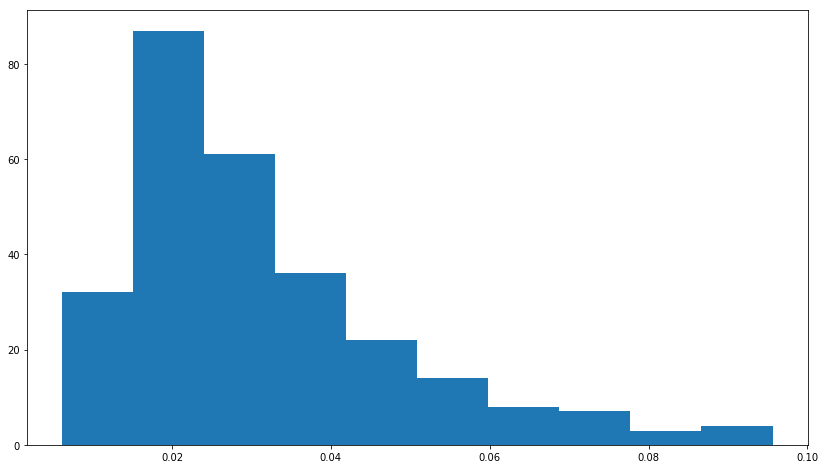

In [88]:
# reconstruction error for the fraud transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

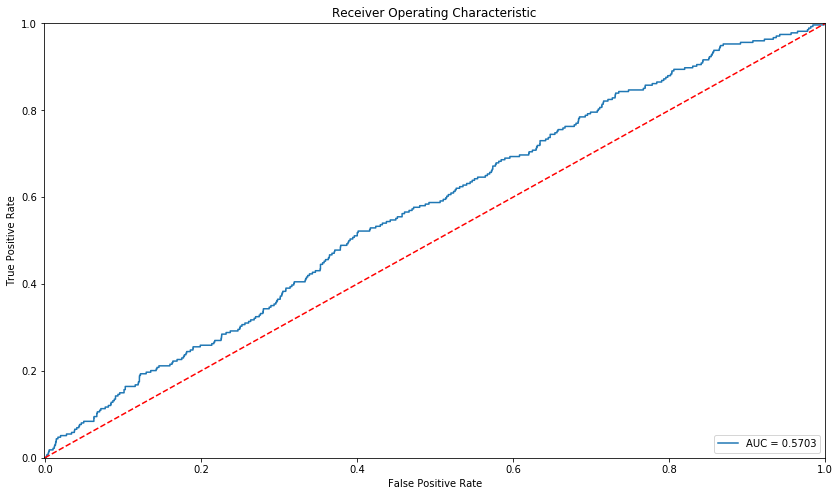

In [89]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

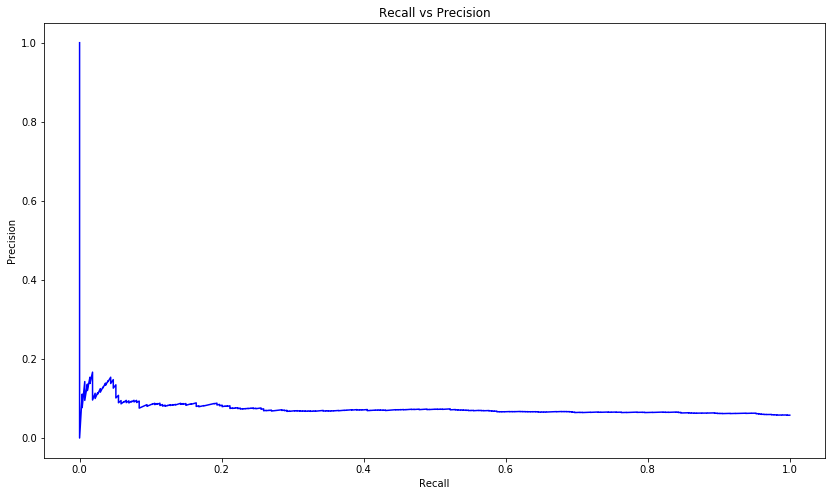

In [90]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

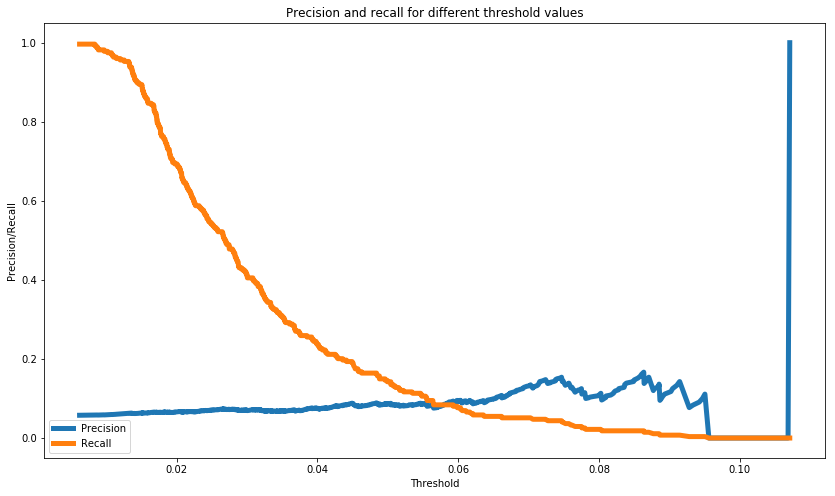

In [91]:
plt.plot(th, precision[1:], label="Precision",linewidth=5)
plt.plot(th, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

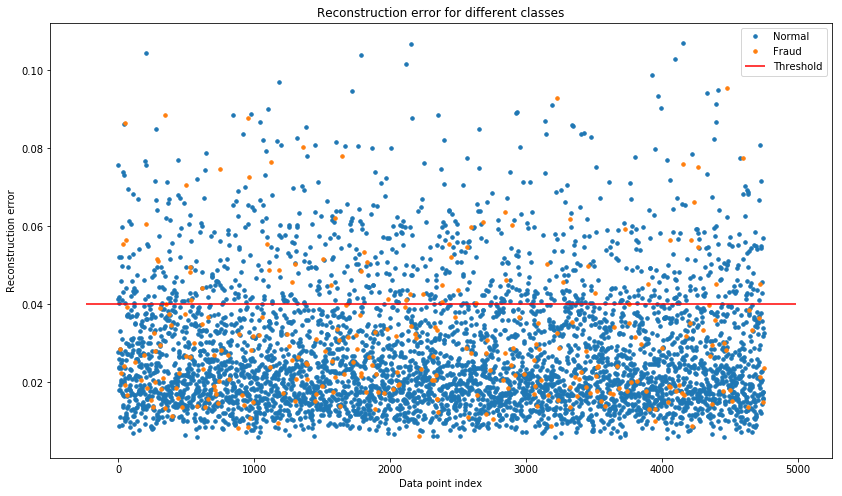

In [112]:
# plot the testing set with the threshold
threshold = 0.04
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

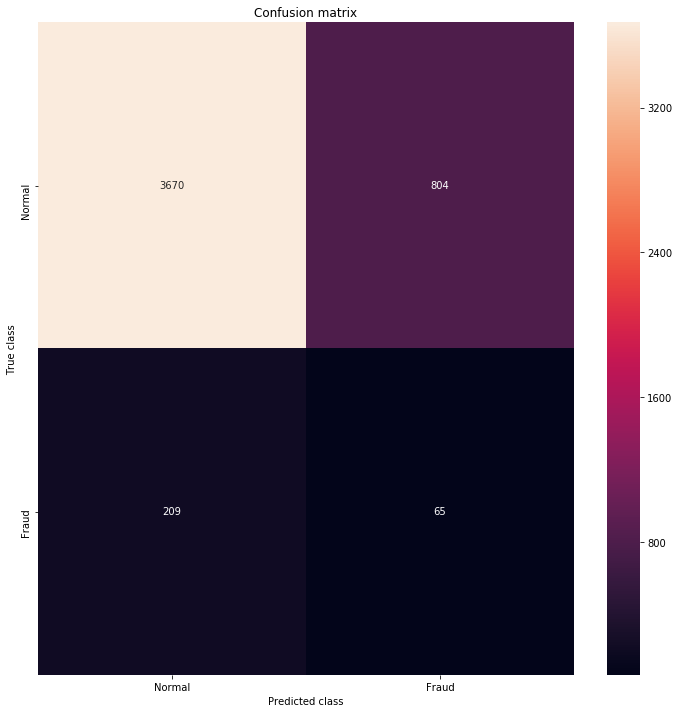

In [113]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [114]:
csr = classification_report(error_df.true_class, y_pred)
print(csr)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      4474
           1       0.07      0.24      0.11       274

   micro avg       0.79      0.79      0.79      4748
   macro avg       0.51      0.53      0.50      4748
weighted avg       0.90      0.79      0.83      4748

